# working with datasets | data up to july 24th 2020

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('full_grouped.csv')

In [4]:
df.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [5]:
df.drop(['New cases', 'New deaths', 'New recovered', 'WHO Region'], axis = 1, inplace=True)

In [6]:
df.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active
0  2020-01-22    Afghanistan          0       0          0       0
1  2020-01-22        Albania          0       0          0       0
2  2020-01-22        Algeria          0       0          0       0
3  2020-01-22        Andorra          0       0          0       0
4  2020-01-22         Angola          0       0          0       0

In [7]:
df.rename(columns={'Country/Region': 'Country'}, inplace = True)

In [8]:
df.head()

Date      Country  Confirmed  Deaths  Recovered  Active
0  2020-01-22  Afghanistan          0       0          0       0
1  2020-01-22      Albania          0       0          0       0
2  2020-01-22      Algeria          0       0          0       0
3  2020-01-22      Andorra          0       0          0       0
4  2020-01-22       Angola          0       0          0       0

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.head()

Date      Country  Confirmed  Deaths  Recovered  Active
0 2020-01-22  Afghanistan          0       0          0       0
1 2020-01-22      Albania          0       0          0       0
2 2020-01-22      Algeria          0       0          0       0
3 2020-01-22      Andorra          0       0          0       0
4 2020-01-22       Angola          0       0          0       0

In [11]:
df.describe()

Confirmed         Deaths     Recovered        Active
count  3.459500e+04   34595.000000  3.459500e+04  3.459500e+04
mean   2.251476e+04    1197.793699  1.042023e+04  1.089674e+04
std    1.430887e+05    7277.336542  6.039296e+04  8.657778e+04
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00
50%    2.250000e+02       4.000000  3.000000e+01  8.000000e+01
75%    3.356000e+03      74.000000  1.186500e+03  1.381500e+03
max    4.112531e+06  145546.000000  1.693214e+06  2.705361e+06

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34595 entries, 0 to 34594
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       34595 non-null  datetime64[ns]
 1   Country    34595 non-null  object        
 2   Confirmed  34595 non-null  int64         
 3   Deaths     34595 non-null  int64         
 4   Recovered  34595 non-null  int64         
 5   Active     34595 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.6+ MB


In [13]:
#df = df.fillna('NA')  -> fills missing values

In [14]:
#imputer = SimpleImputer(strategy='constant')
#df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns) -> fills missing values also

In [15]:
df.head(10)

Date              Country  Confirmed  Deaths  Recovered  Active
0 2020-01-22          Afghanistan          0       0          0       0
1 2020-01-22              Albania          0       0          0       0
2 2020-01-22              Algeria          0       0          0       0
3 2020-01-22              Andorra          0       0          0       0
4 2020-01-22               Angola          0       0          0       0
5 2020-01-22  Antigua and Barbuda          0       0          0       0
6 2020-01-22            Argentina          0       0          0       0
7 2020-01-22              Armenia          0       0          0       0
8 2020-01-22            Australia          0       0          0       0
9 2020-01-22              Austria          0       0          0       0

In [16]:
df_grouped = df.groupby(['Country', 'Date'])[['Country', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [17]:
df_grouped

Country       Date  Confirmed  Deaths  Recovered  Active
0      Afghanistan 2020-01-22          0       0          0       0
1      Afghanistan 2020-01-23          0       0          0       0
2      Afghanistan 2020-01-24          0       0          0       0
3      Afghanistan 2020-01-25          0       0          0       0
4      Afghanistan 2020-01-26          0       0          0       0
...            ...        ...        ...     ...        ...     ...
34590     Zimbabwe 2020-07-20       1713      26        472    1215
34591     Zimbabwe 2020-07-21       1820      26        488    1306
34592     Zimbabwe 2020-07-22       2034      26        510    1498
34593     Zimbabwe 2020-07-23       2124      28        510    1586
34594     Zimbabwe 2020-07-24       2296      32        514    1750

[34595 rows x 6 columns]

In [26]:
df3 = df_grouped[df_grouped['Confirmed']>0]

In [27]:
df3.head(100)

Country       Date  Confirmed  Deaths  Recovered  Active
33   Afghanistan 2020-02-24          1       0          0       1
34   Afghanistan 2020-02-25          1       0          0       1
35   Afghanistan 2020-02-26          1       0          0       1
36   Afghanistan 2020-02-27          1       0          0       1
37   Afghanistan 2020-02-28          1       0          0       1
..           ...        ...        ...     ...        ...     ...
128  Afghanistan 2020-05-29      13659     246       1259   12154
129  Afghanistan 2020-05-30      14525     249       1303   12973
130  Afghanistan 2020-05-31      15205     257       1328   13620
131  Afghanistan 2020-06-01      15750     265       1428   14057
132  Afghanistan 2020-06-02      16509     270       1450   14789

[100 rows x 6 columns]

# PLOTTING

In [22]:
import matplotlib.pyplot as plt

In [ ]:
countries = df_grouped['Country'].unique()
len(countries)

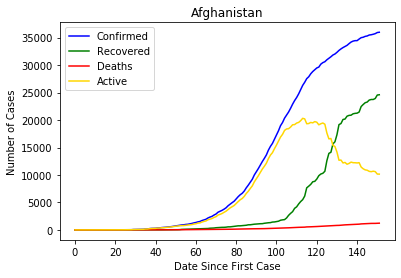

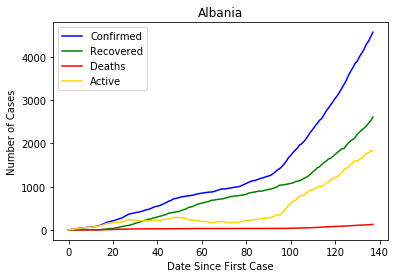

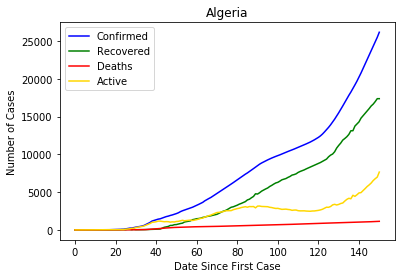

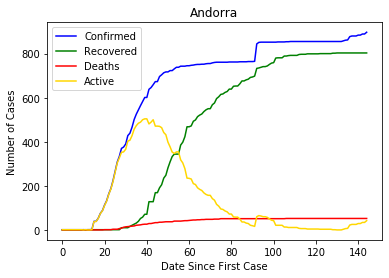

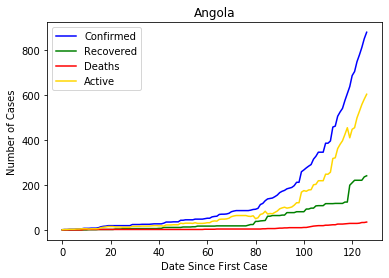

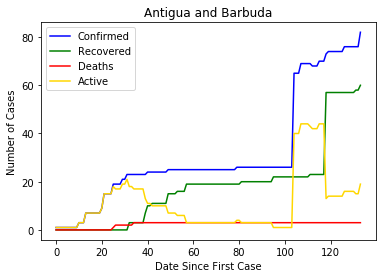

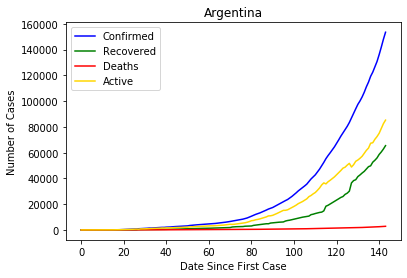

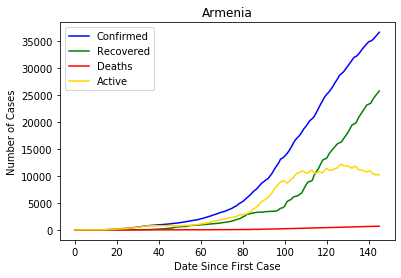

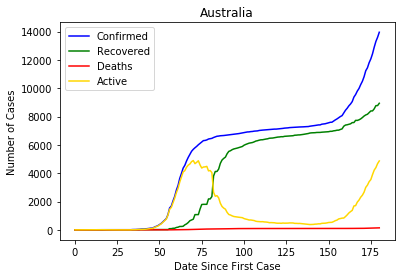

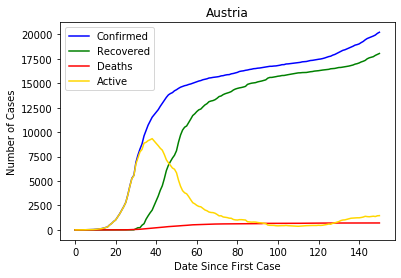

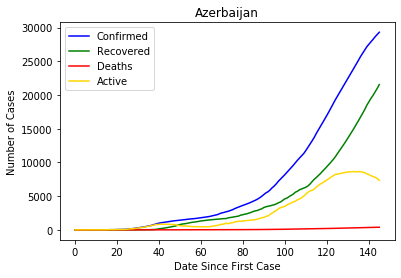

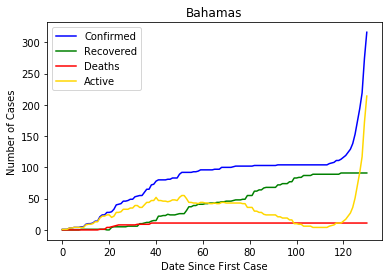

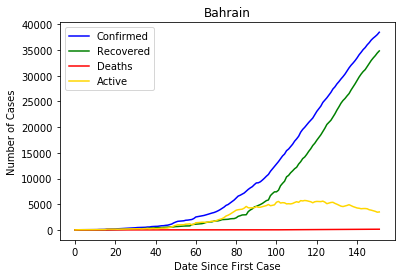

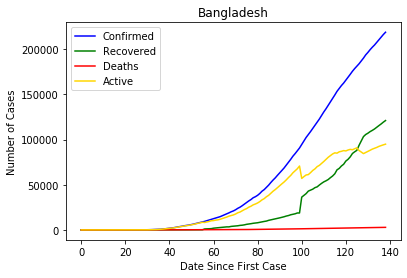

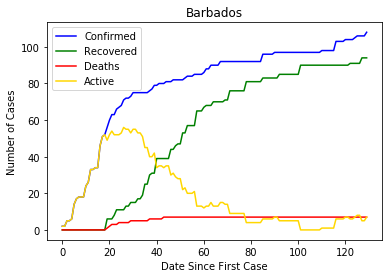

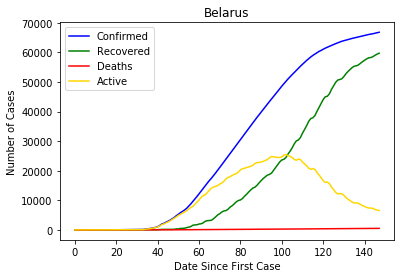

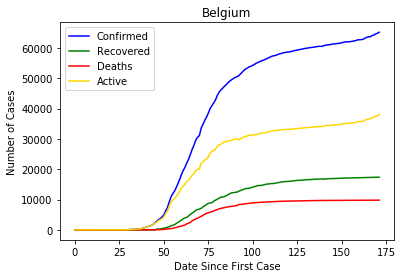

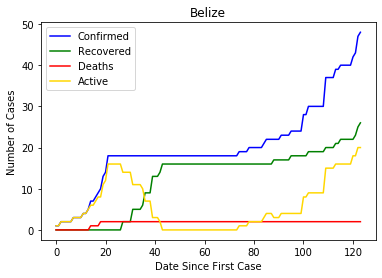

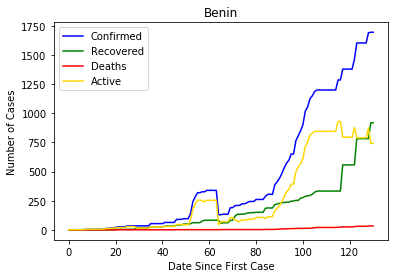

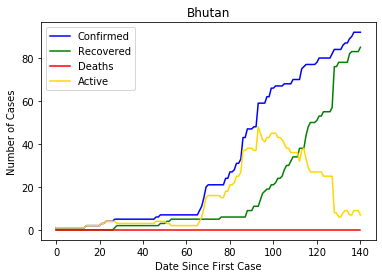

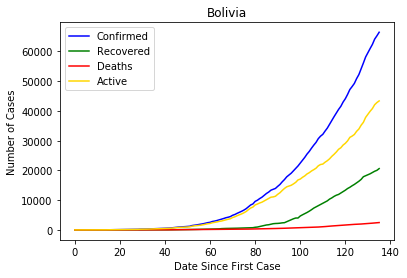

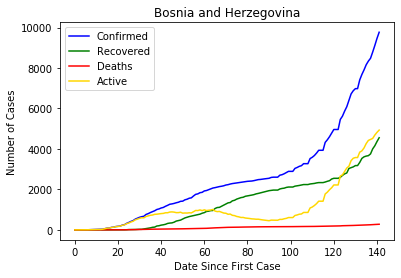

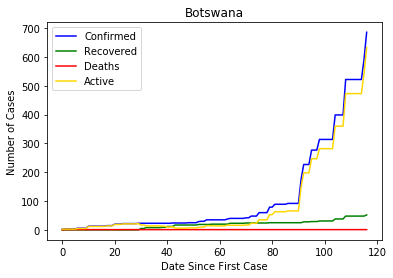

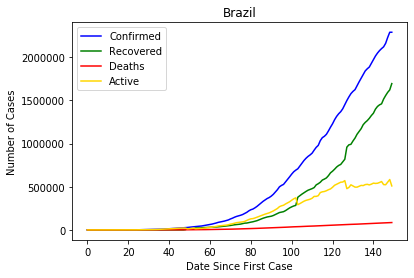

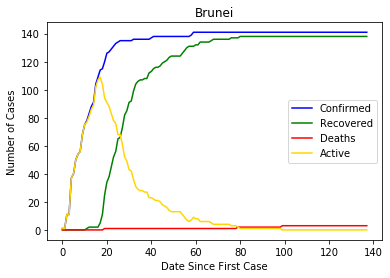

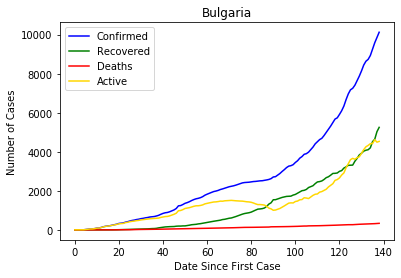

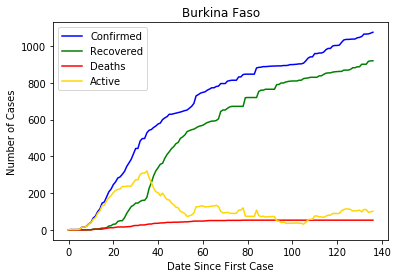

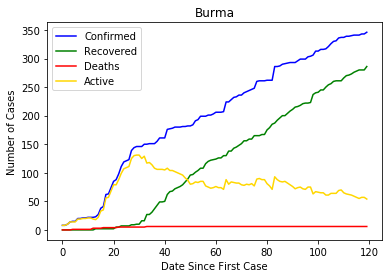

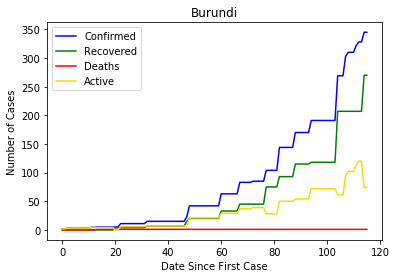

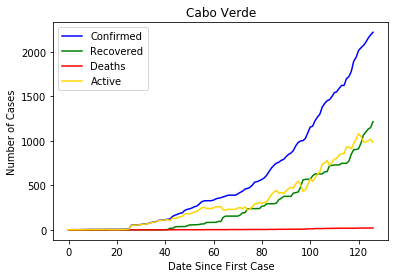

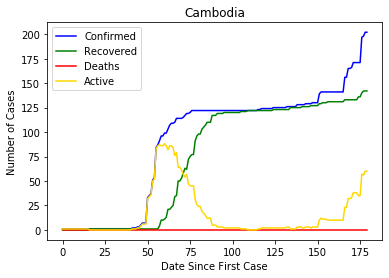

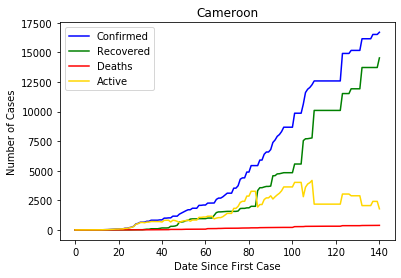

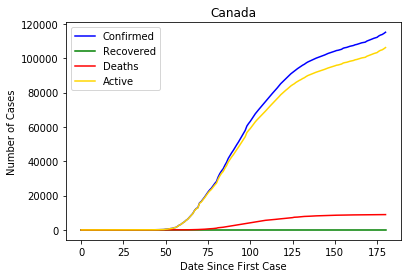

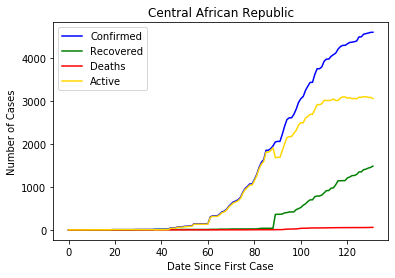

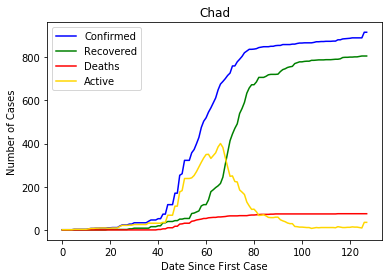

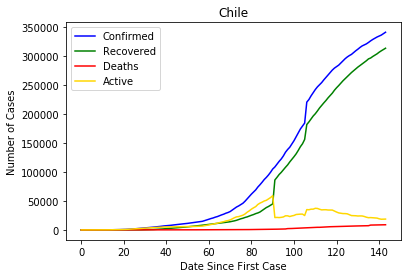

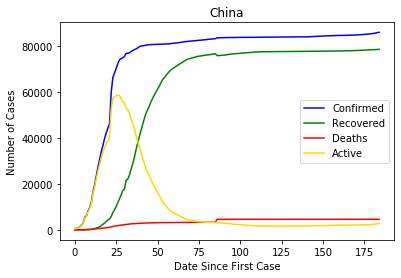

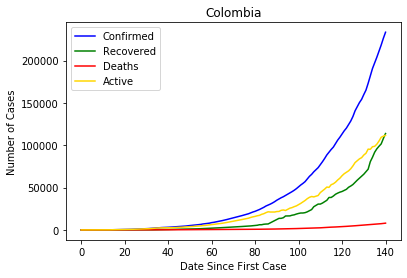

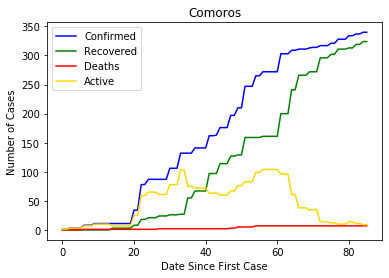

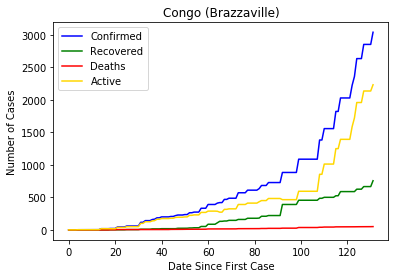

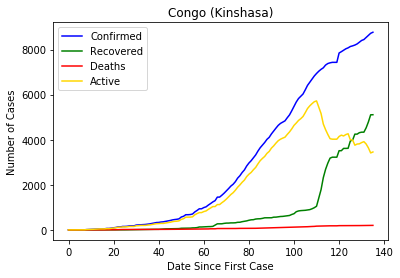

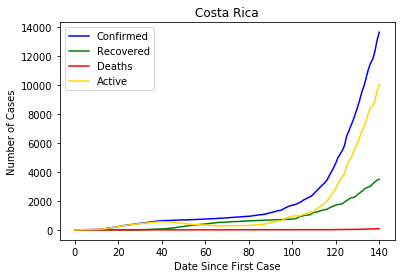

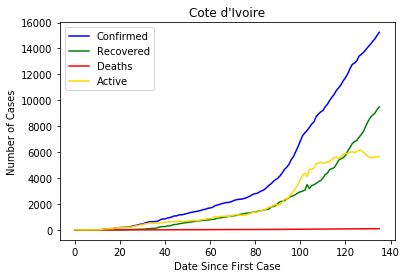

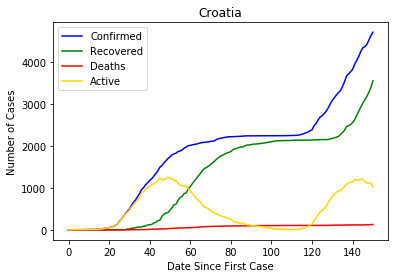

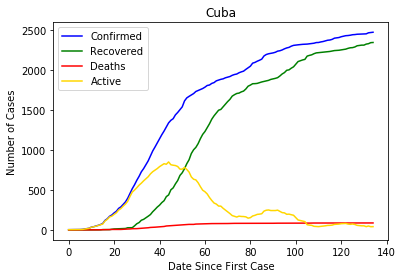

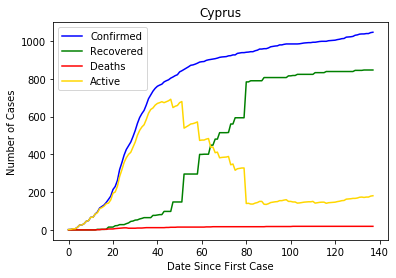

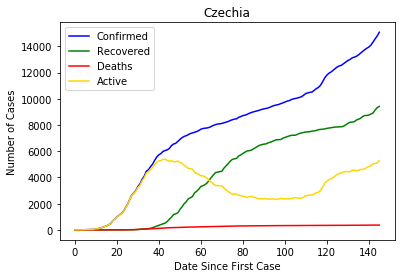

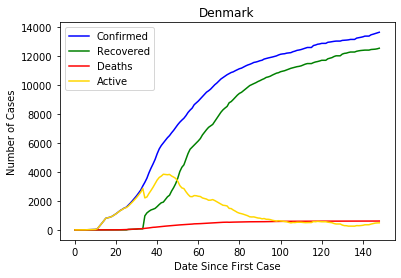

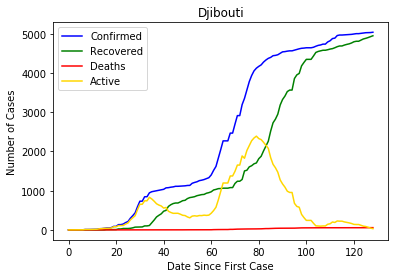

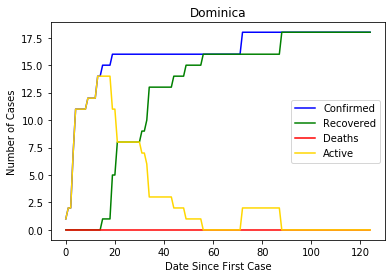

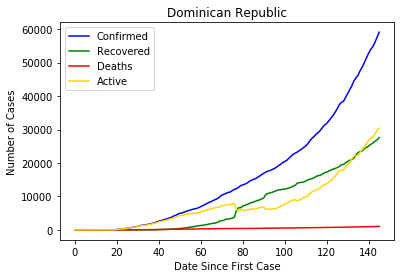

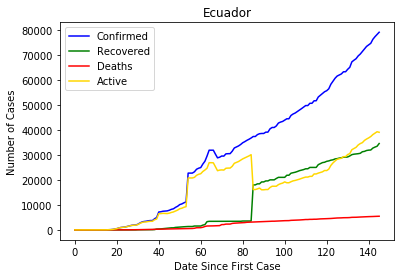

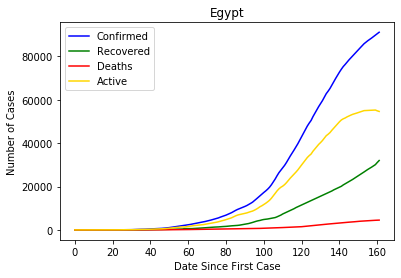

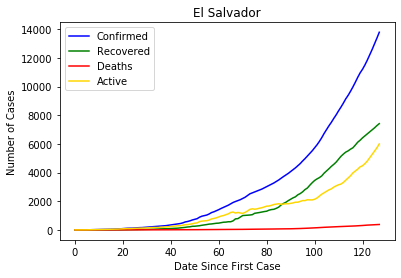

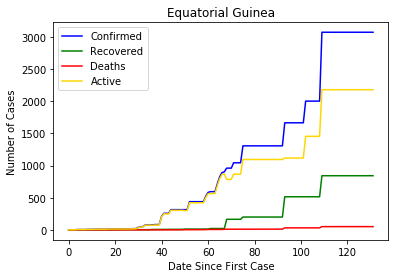

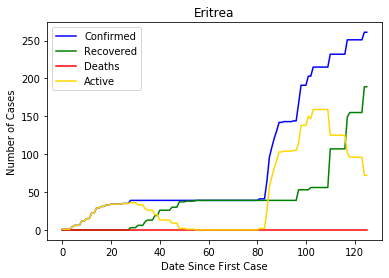

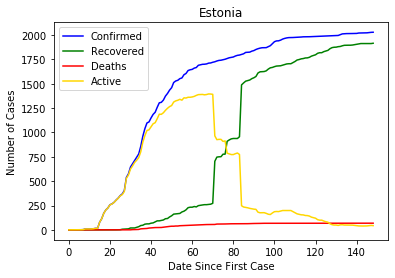

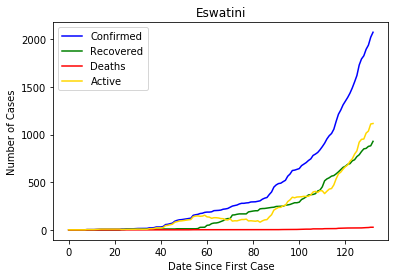

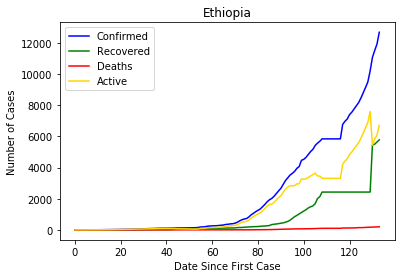

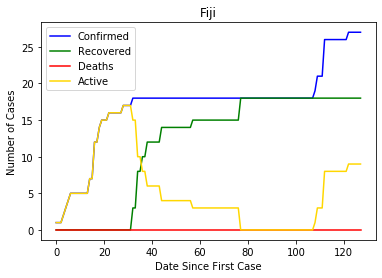

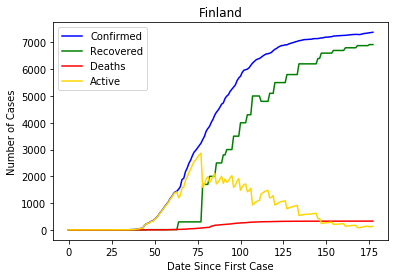

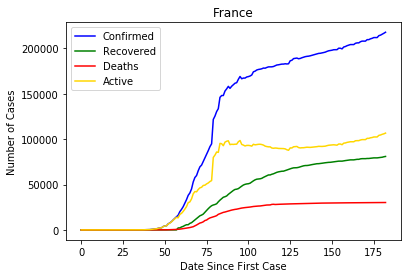

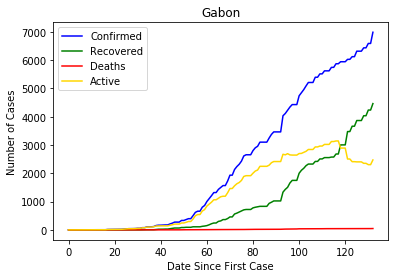

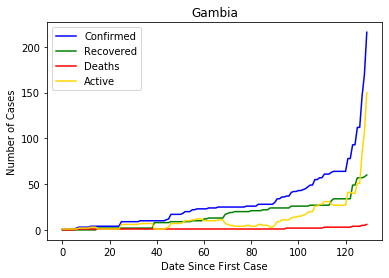

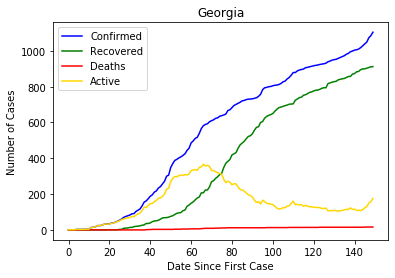

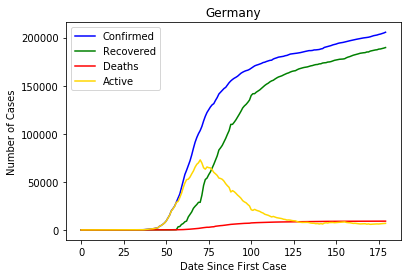

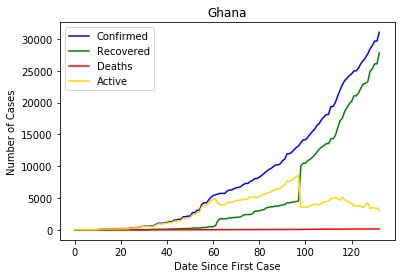

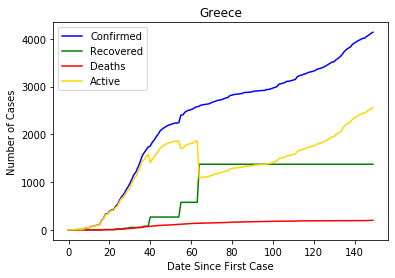

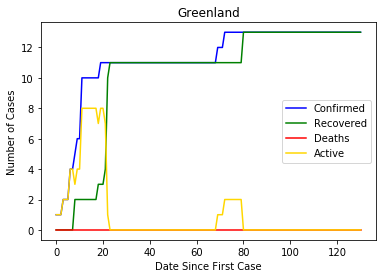

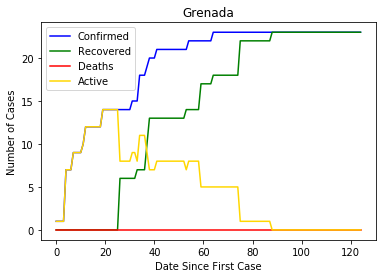

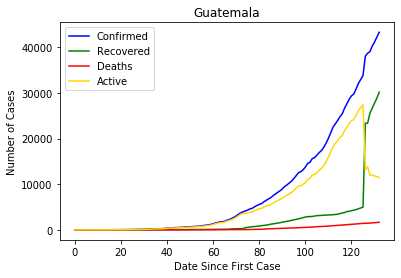

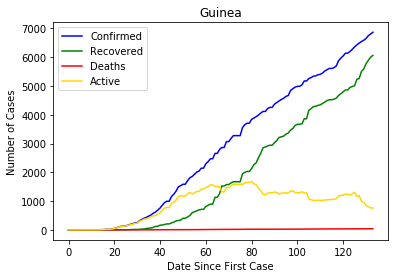

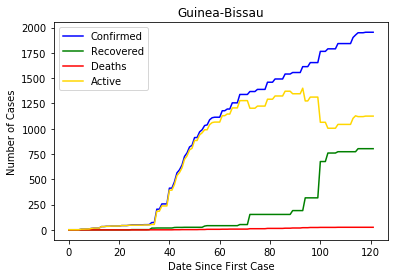

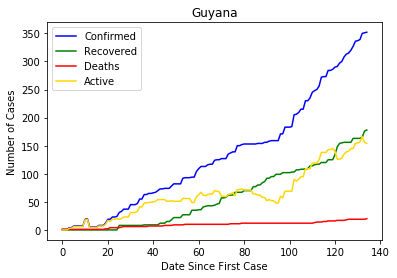

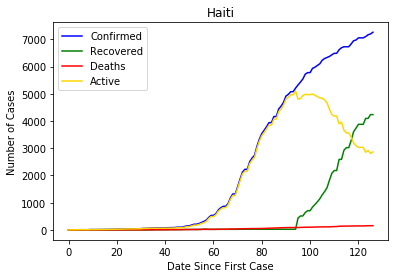

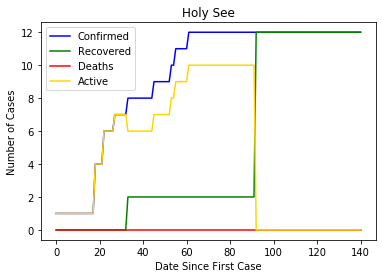

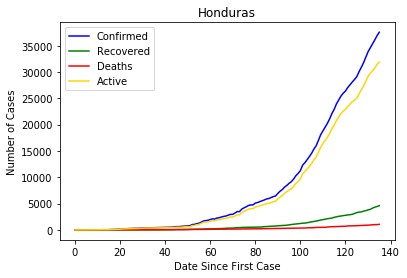

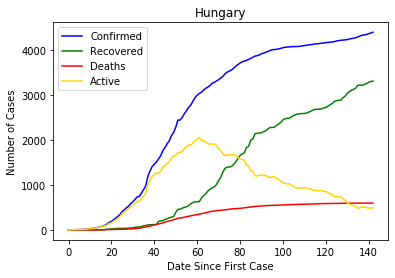

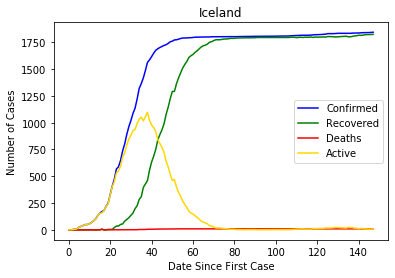

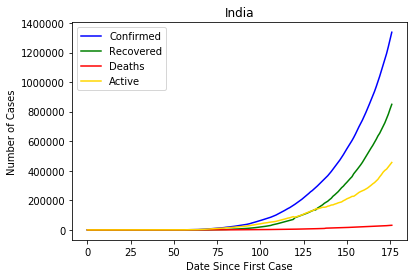

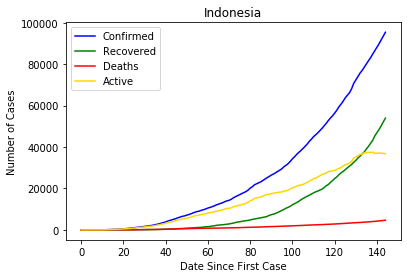

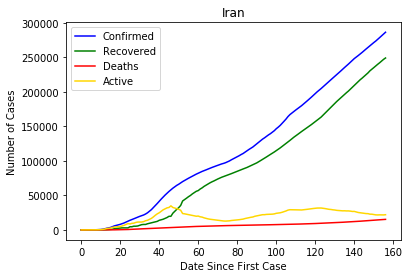

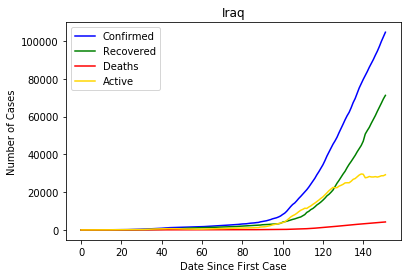

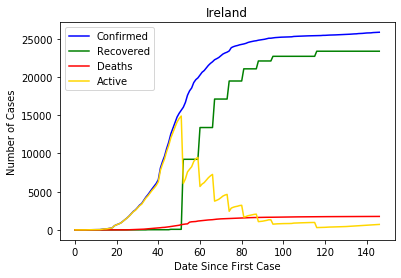

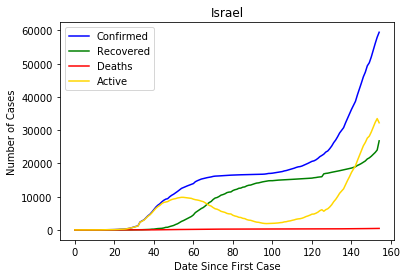

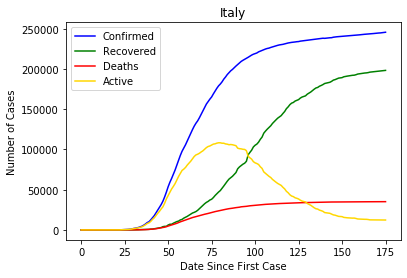

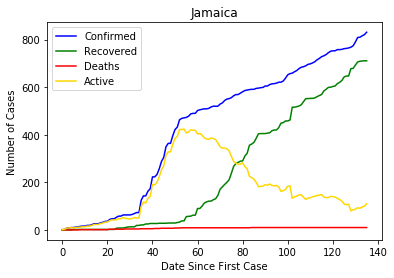

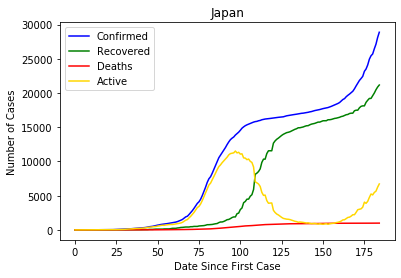

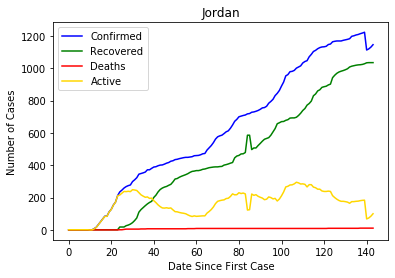

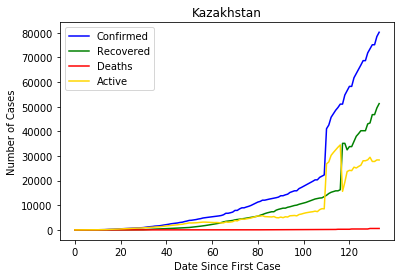

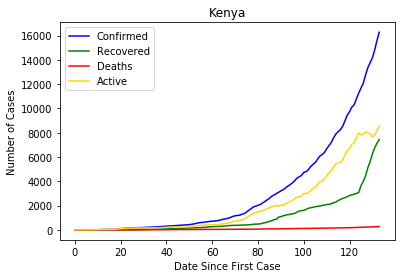

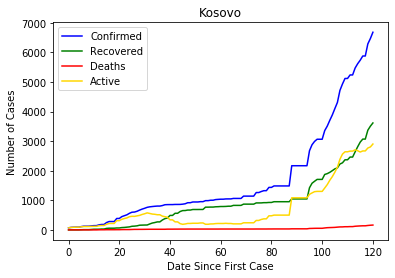

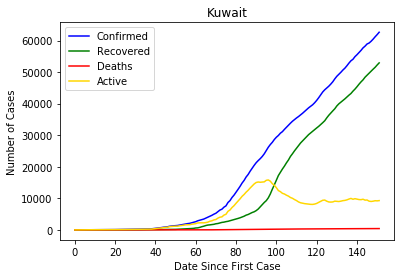

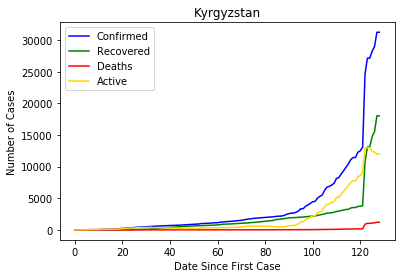

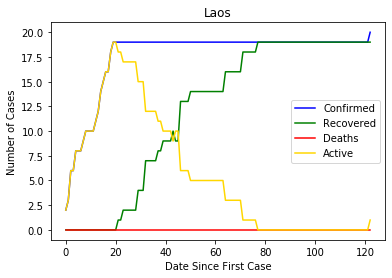

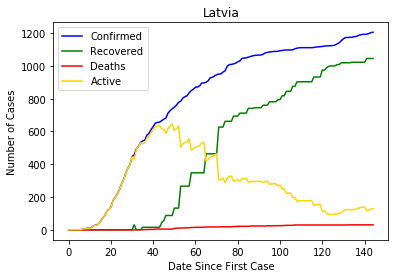

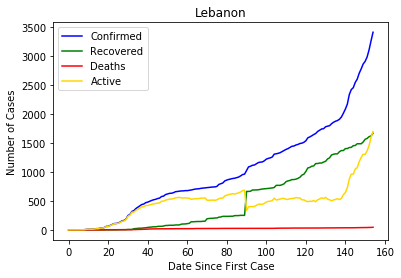

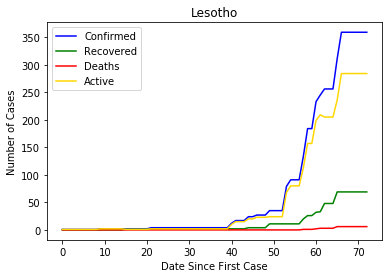

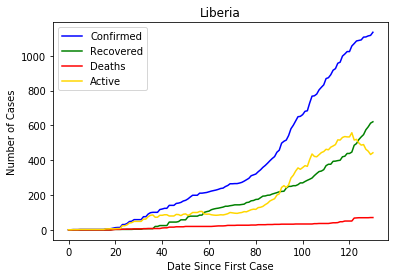

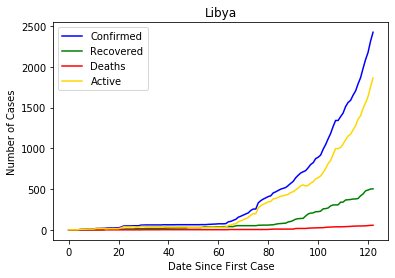

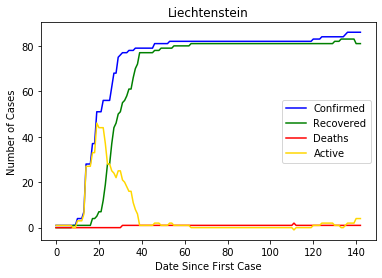

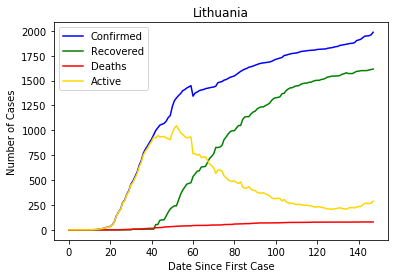

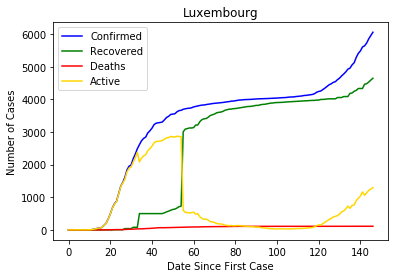

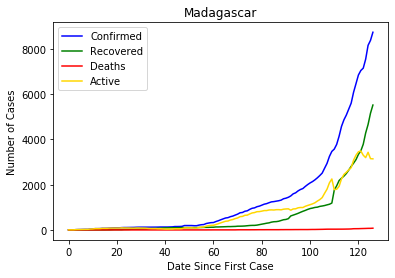

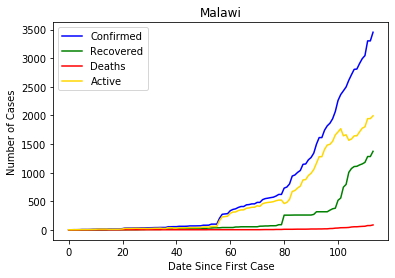

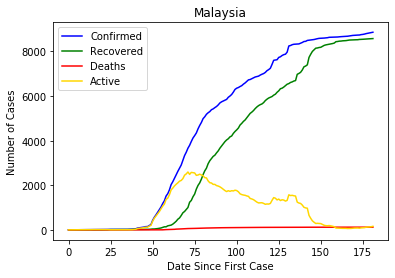

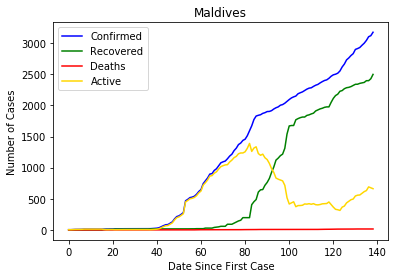

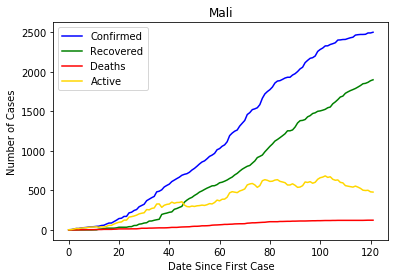

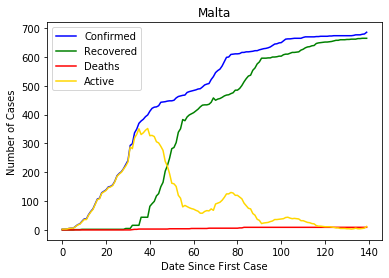

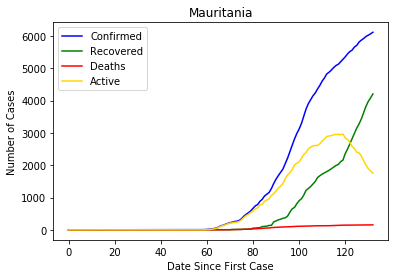

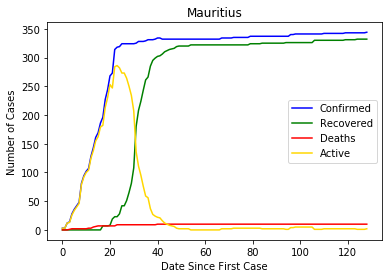

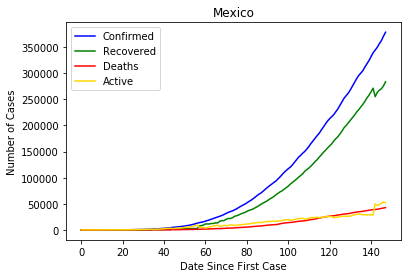

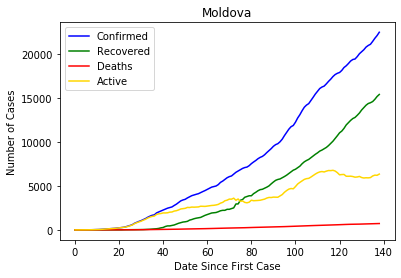

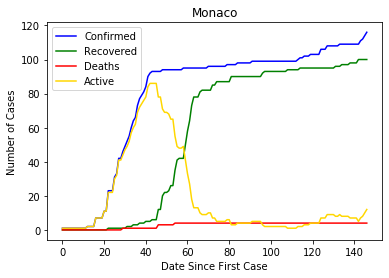

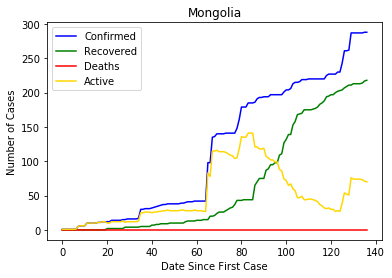

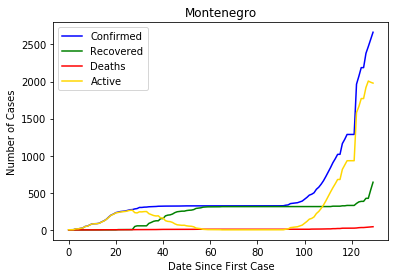

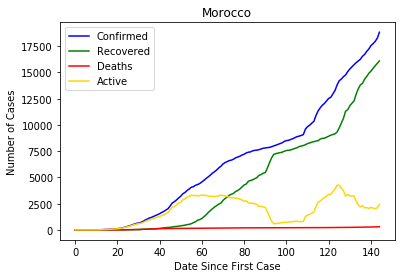

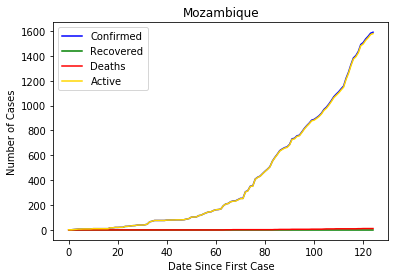

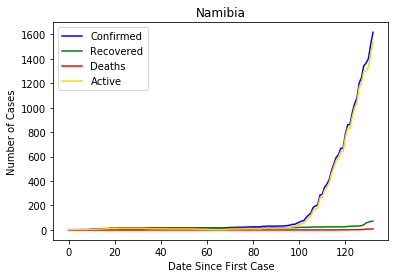

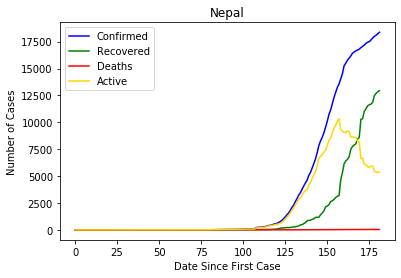

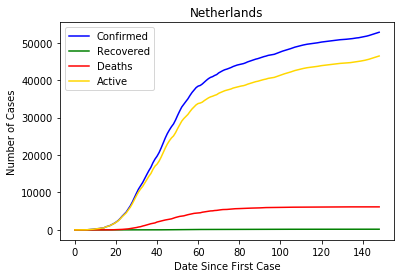

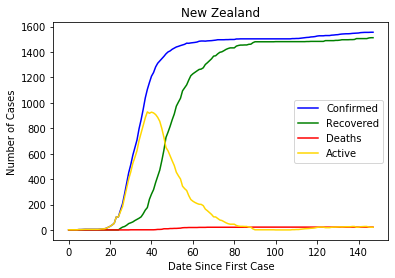

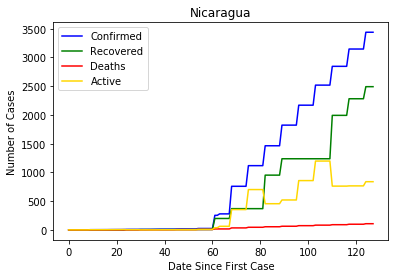

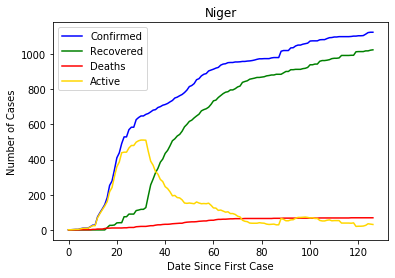

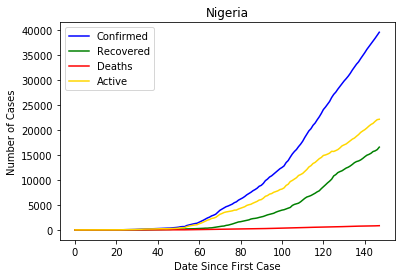

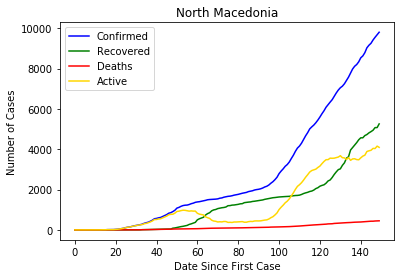

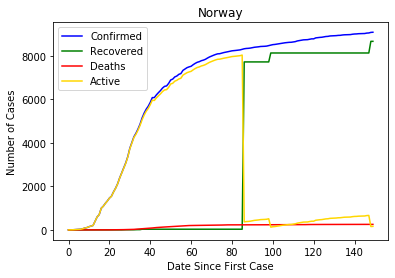

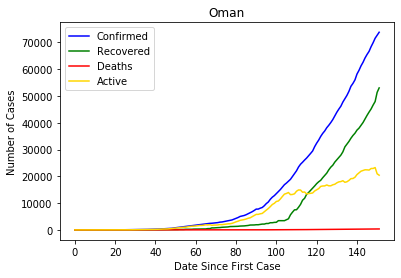

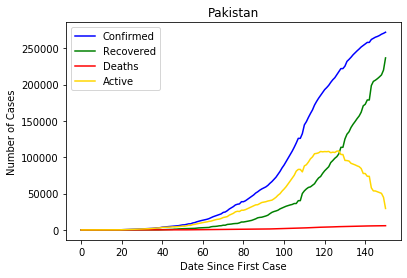

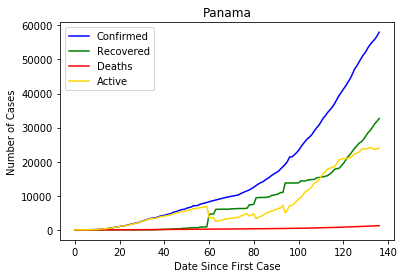

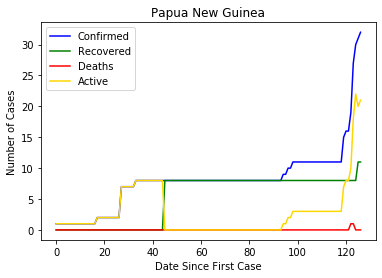

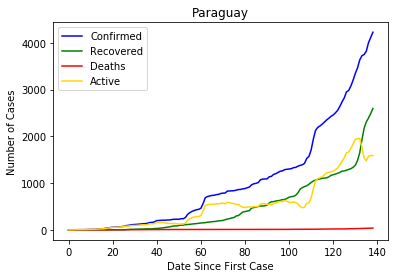

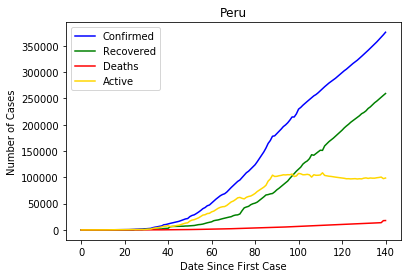

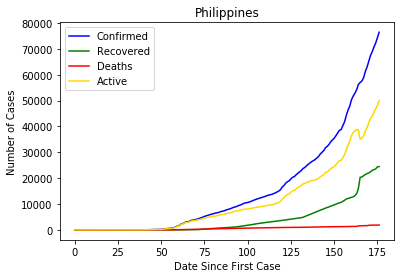

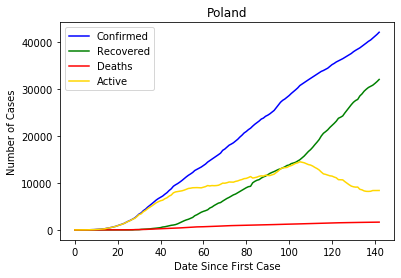

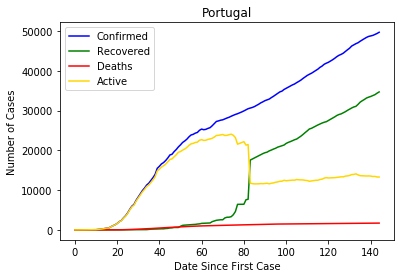

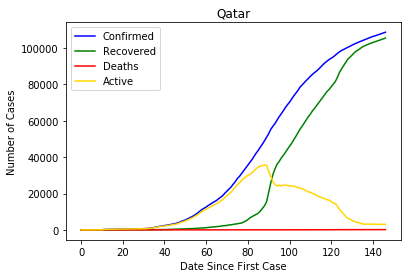

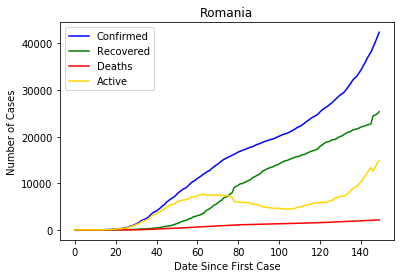

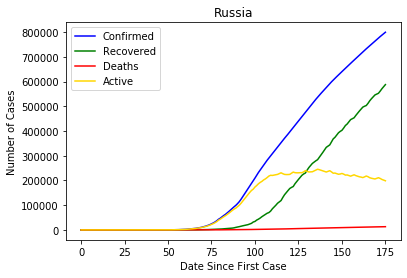

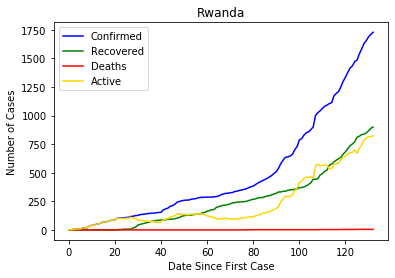

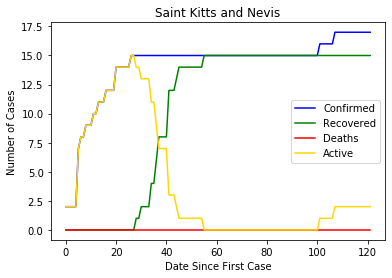

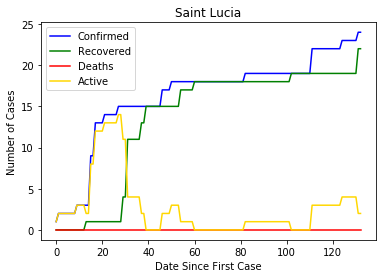

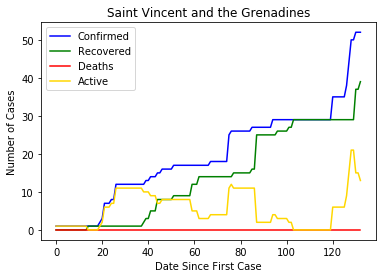

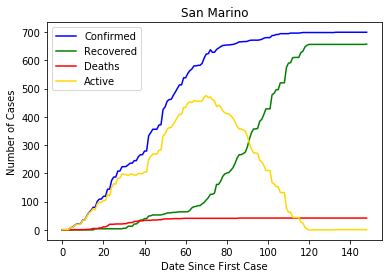

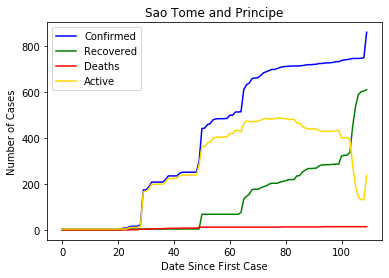

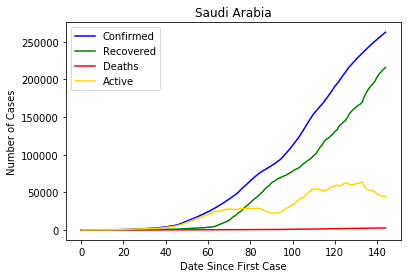

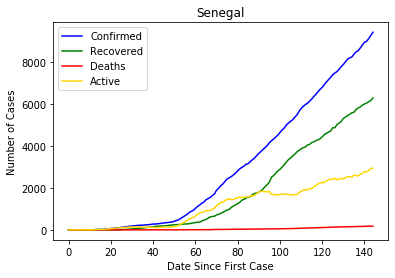

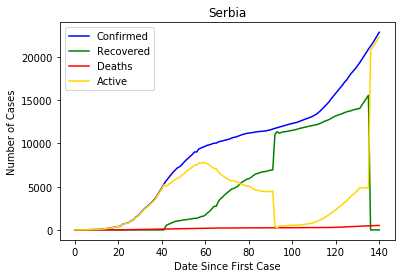

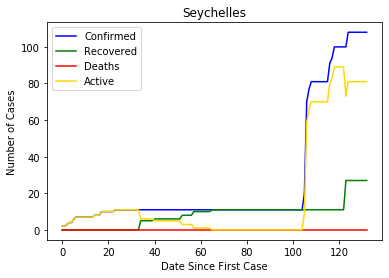

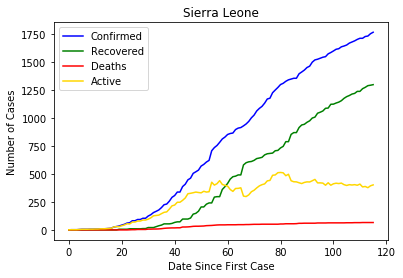

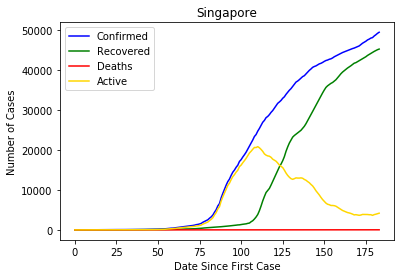

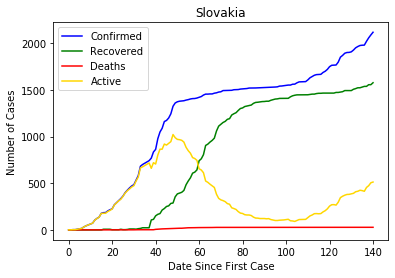

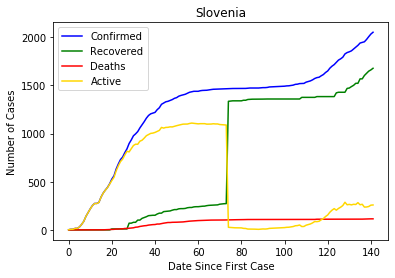

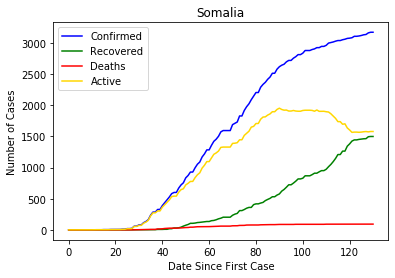

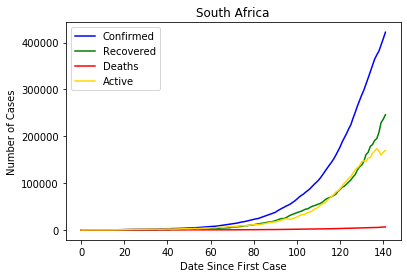

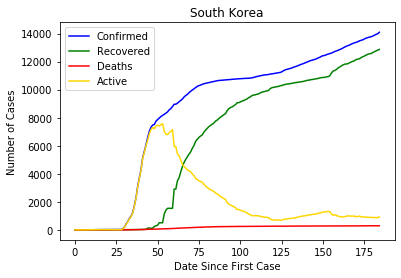

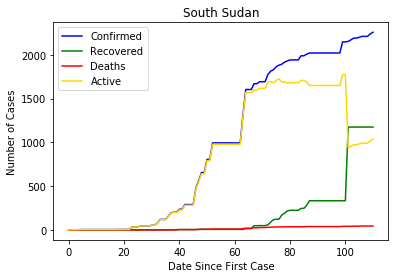

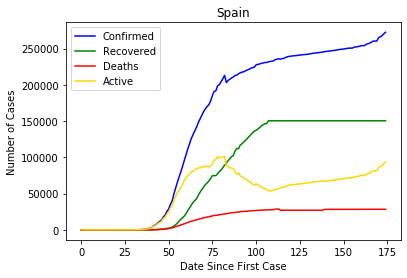

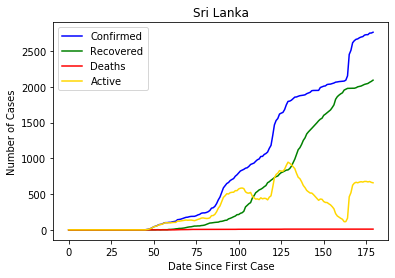

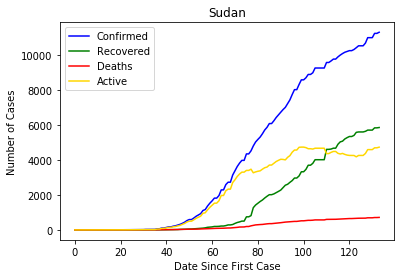

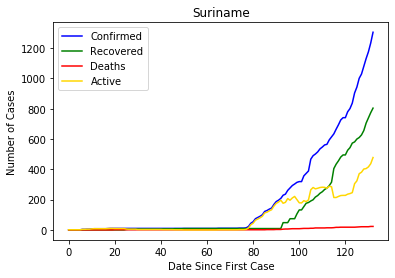

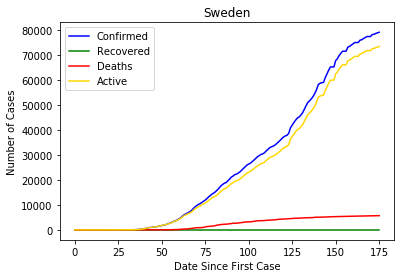

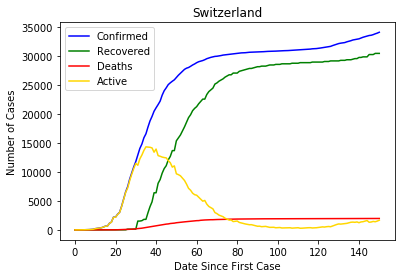

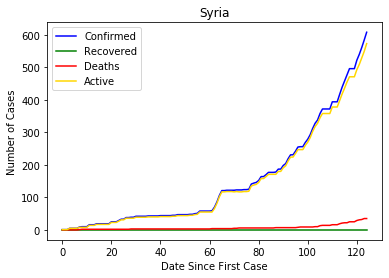

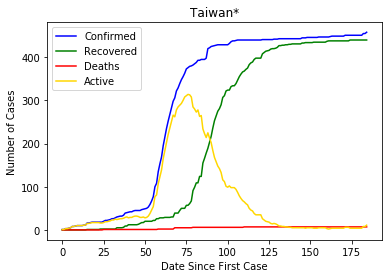

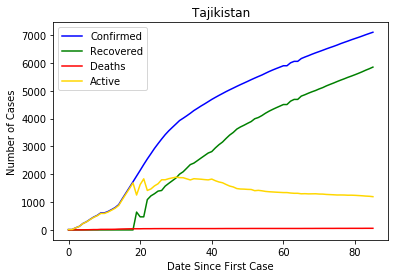

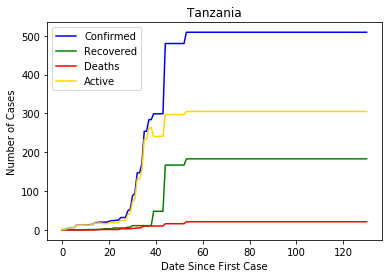

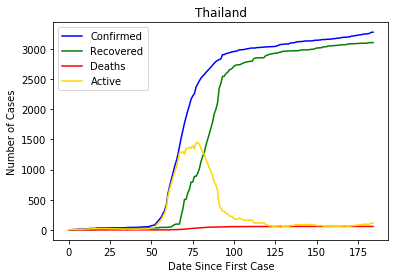

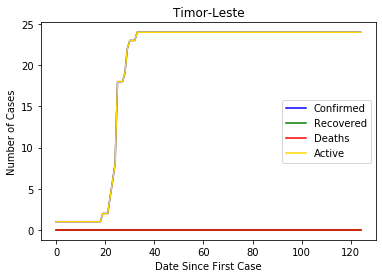

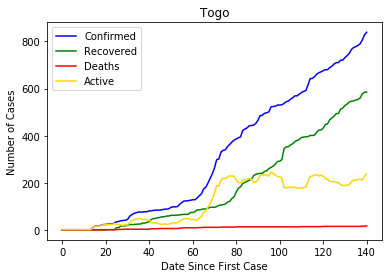

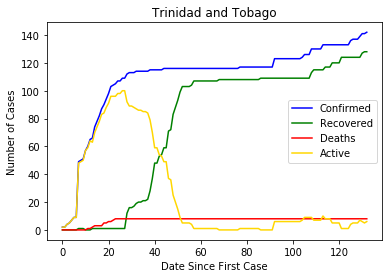

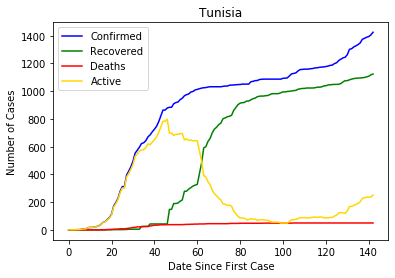

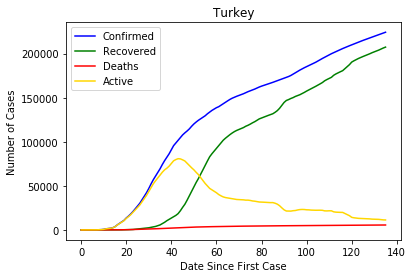

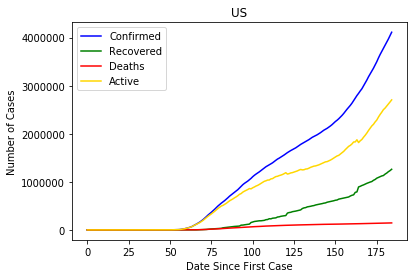

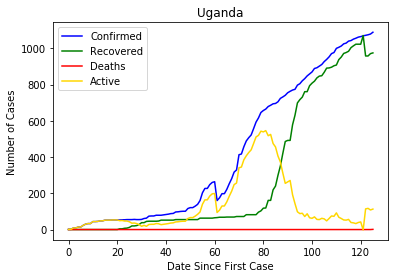

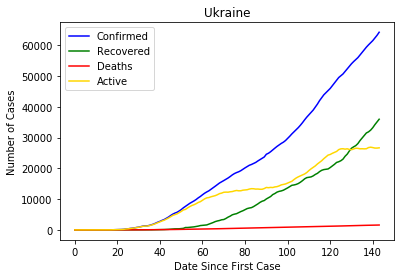

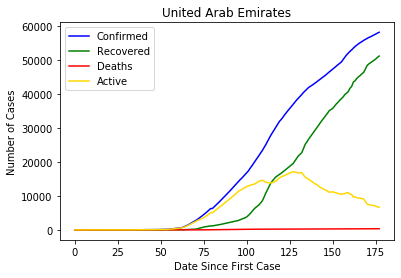

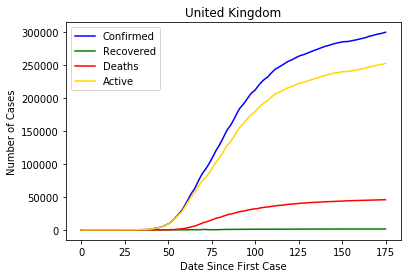

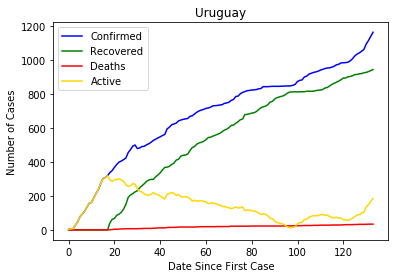

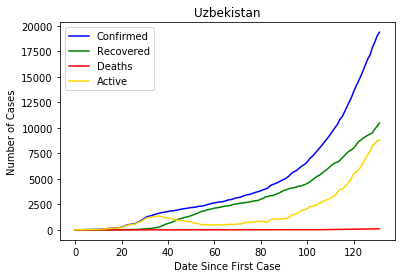

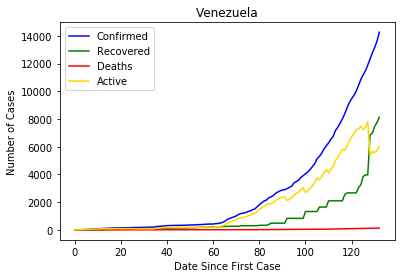

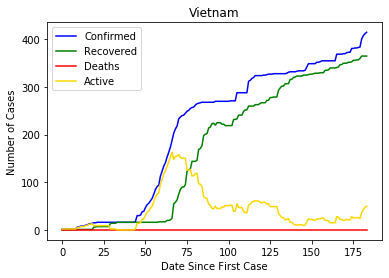

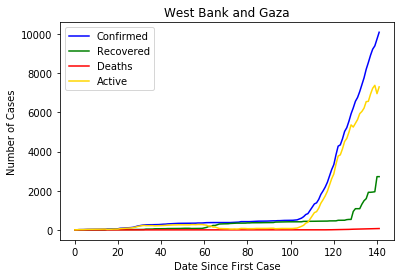

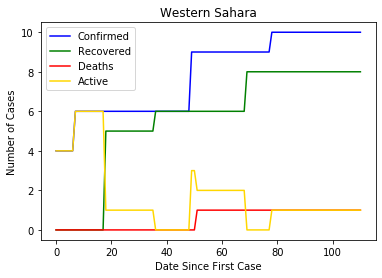

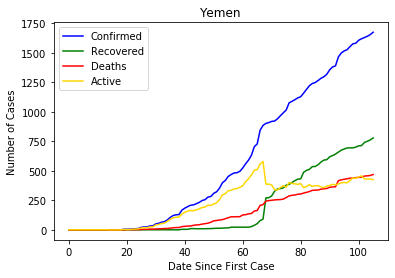

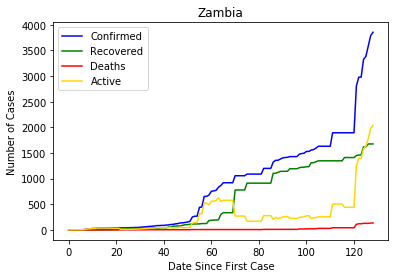

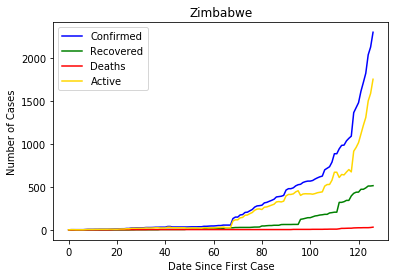

In [32]:
for i in range(len(countries)):
    c = df3[df3['Country'] == countries[i]].reset_index()
    plt.plot(np.arange(0, len(c)), c['Confirmed'], color='blue', label='Confirmed')
    plt.plot(np.arange(0, len(c)), c['Recovered'], color='green', label='Recovered')
    plt.plot(np.arange(0, len(c)), c['Deaths'], color='red', label='Deaths')
    plt.plot(np.arange(0, len(c)), c['Active'], color='gold', label='Active')
    plt.title(countries[i])
    plt.xlabel('Date Since First Case')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

In [34]:
df_all = df3.groupby(['Date'])[['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

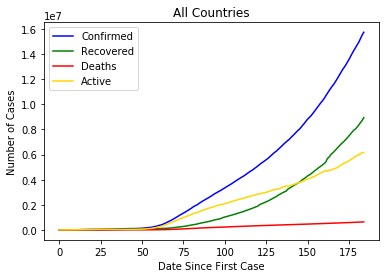

In [36]:
c = df_all
plt.plot(np.arange(0, len(c)), c['Confirmed'], color='blue', label='Confirmed')
plt.plot(np.arange(0, len(c)), c['Recovered'], color='green', label='Recovered')
plt.plot(np.arange(0, len(c)), c['Deaths'], color='red', label='Deaths')
plt.plot(np.arange(0, len(c)), c['Active'], color='gold', label='Active')
plt.title('All Countries')
plt.xlabel('Date Since First Case')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()